Get Dataset

In [2]:
path = "/net/ens/am4ip/datasets/project-dataset"
rainyImagesPath = path + '/rainy_images'
rainySsegPath = path + '/rainy_sseg'
sunnyImagesPath = path + '/sunny_images'
sunnySsegPath = path + '/sunny_sseg'

In [23]:
cd /net/ens/am4ip/datasets/project-dataset/

/autofs/unityaccount/ens/am4ip/datasets/project-dataset


In [24]:
ls rainy_sseg

00053921.png  00054650.png  00055379.png  00063100.png  00063829.png
00053922.png  00054651.png  00055380.png  00063101.png  00063830.png
00053923.png  00054652.png  00055381.png  00063102.png  00063831.png
00053924.png  00054653.png  00055382.png  00063103.png  00063832.png
00053925.png  00054654.png  00055383.png  00063104.png  00063833.png
00053926.png  00054655.png  00055384.png  00063105.png  00063834.png
00053927.png  00054656.png  00055385.png  00063106.png  00063835.png
00053928.png  00054657.png  00055386.png  00063107.png  00063836.png
00053929.png  00054658.png  00055387.png  00063108.png  00063837.png
00053930.png  00054659.png  00055388.png  00063109.png  00063838.png
00053931.png  00054660.png  00055389.png  00063110.png  00063839.png
00053932.png  00054661.png  00055390.png  00063111.png  00063840.png
00053933.png  00054662.png  00055391.png  00063112.png  00063841.png
00053934.png  00054663.png  00055392.png  00063113.png  00063842.png
00053935.png  00054664.png  000553

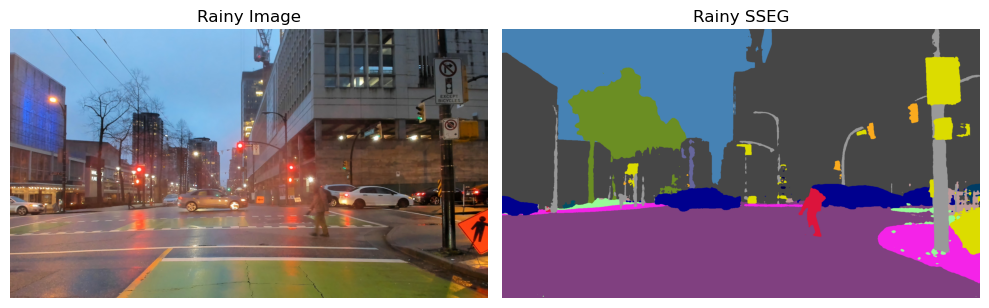

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the images
image1_path = '/net/ens/am4ip/datasets/project-dataset/rainy_images/00063069.png'  # Replace with the path to your first image
image2_path = '/net/ens/am4ip/datasets/project-dataset/rainy_sseg/00063069.png'    # Replace with the path to your second image

# Load the images
img1 = mpimg.imread(image1_path)
img2 = mpimg.imread(image2_path)

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img1)
axes[0].axis('off')  # Turn off axis labels
axes[0].set_title('Rainy Image')

axes[1].imshow(img2)
axes[1].axis('off')  # Turn off axis labels
axes[1].set_title('Rainy SSEG')

plt.tight_layout()
plt.show()


### Number of images in each folder

In [7]:
import os

def countImagesInFolder(folderPath):
    return len([f for f in os.listdir(folderPath) if os.path.isfile(os.path.join(folderPath, f))])

In [6]:
print('Number of rainy images:', countImagesInFolder(rainyImagesPath))
print('Number of sunny images:', countImagesInFolder(sunnyImagesPath))

Number of rainy images: 3642
Number of sunny images: 3779


### Class distribution analysis in each of the segmantation folders

In [19]:
from pathlib import Path
MASK_PATH = Path(rainySsegPath)
MASK_PATH_LIST = list(MASK_PATH.glob("*.png"))
MASK_PATH_LIST = sorted(MASK_PATH_LIST)

print(f'Total Masks = {len(MASK_PATH_LIST)}')

Total Masks = 3642


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Class names and RGB mapping (updated from the first prompt)
classNames = {
    (0, 0, 0): 'Unlabeled',
    (0, 0, 0): 'Static',
    (111, 74, 0): 'Dynamic',
    (81, 0, 81): 'Ground',
    (128, 64, 128): 'Road',
    (244, 35, 232): 'Sidewalk',
    (250, 170, 160): 'Parking',
    (230, 150, 140): 'Rail track',
    (70, 70, 70): 'Building',
    (102, 102, 156): 'Wall',
    (190, 153, 153): 'Fence',
    (180, 165, 180): 'Guard rail',
    (150, 100, 100): 'Bridge',
    (150, 120, 90): 'Tunnel',
    (153, 153, 153): 'Pole',
    (153, 153, 153): 'Pole group',
    (250, 170, 30): 'Traffic light',
    (220, 220, 0): 'Traffic sign',
    (107, 142, 35): 'Vegetation',
    (152, 251, 152): 'Terrain',
    (70, 130, 180): 'Sky',
    (220, 20, 60): 'Person',
    (255, 0, 0): 'Rider',
    (0, 0, 142): 'Car',
    (0, 0, 70): 'Truck',
    (0, 60, 100): 'Bus',
    (0, 0, 90): 'Caravan',
    (0, 0, 110): 'Trailer',
    (0, 80, 100): 'Train',
    (0, 0, 230): 'Motorcycle',
    (119, 11, 32): 'Bicycle'
}

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

def getClassDistribution(maskPaths, classNames, n=100):
    """
    Computes the class distribution for a random selection of masks.
    
    Parameters:
    - maskPaths (list): List of file paths to the mask images.
    - classNames (dict): Dictionary mapping RGB tuples to class names.
    - n (int, optional): Number of images to randomly select. If None, all images are used.
    
    Returns:
    - distribution (dict): Dictionary with class names as keys and pixel counts as values.
    """
    # If n is specified, randomly select n images
    if n is not None and n < len(maskPaths):
        maskPaths = random.sample(maskPaths, n)

    # Initialize the distribution dictionary
    distribution = {className: 0 for className in classNames.values()}

    # Reverse the dictionary to map RGB to class names
    rgbToClass = {rgb: name for rgb, name in classNames.items()}

    for maskPath in maskPaths:
        # Load the mask image
        mask = Image.open(maskPath).convert("RGB")  # Ensure the mask is read as RGB
        maskPixels = np.array(mask).reshape(-1, 3)  # Reshape the mask to a list of RGB tuples

        # Count occurrences of each class in the mask
        pixelCounter = Counter(map(tuple, maskPixels))

        # Update the distribution dictionary
        for rgb, count in pixelCounter.items():
            if rgb in rgbToClass:
                distribution[rgbToClass[rgb]] += count

    return distribution

def plotClassDistribution(distribution, title="Class Distribution"):
    """
    Plots the class distribution in descending order.

    Parameters:
    - distribution (dict): Dictionary with class names as keys and pixel counts as values.
    """
    # Sort distribution by pixel count in descending order
    sortedDistribution = sorted(distribution.items(), key=lambda x: x[1], reverse=True)

    # Extract class names and pixel counts
    classNames, pixelCounts = zip(*sortedDistribution)

    # Plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(classNames, pixelCounts)
    plt.xlabel("Class Name")
    plt.ylabel("Pixel Count")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")

    # Add pixel counts parallel to the bars
    for bar, count in zip(bars, pixelCounts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(count), ha='center', va='center', rotation=90)

    plt.tight_layout()
    plt.show()

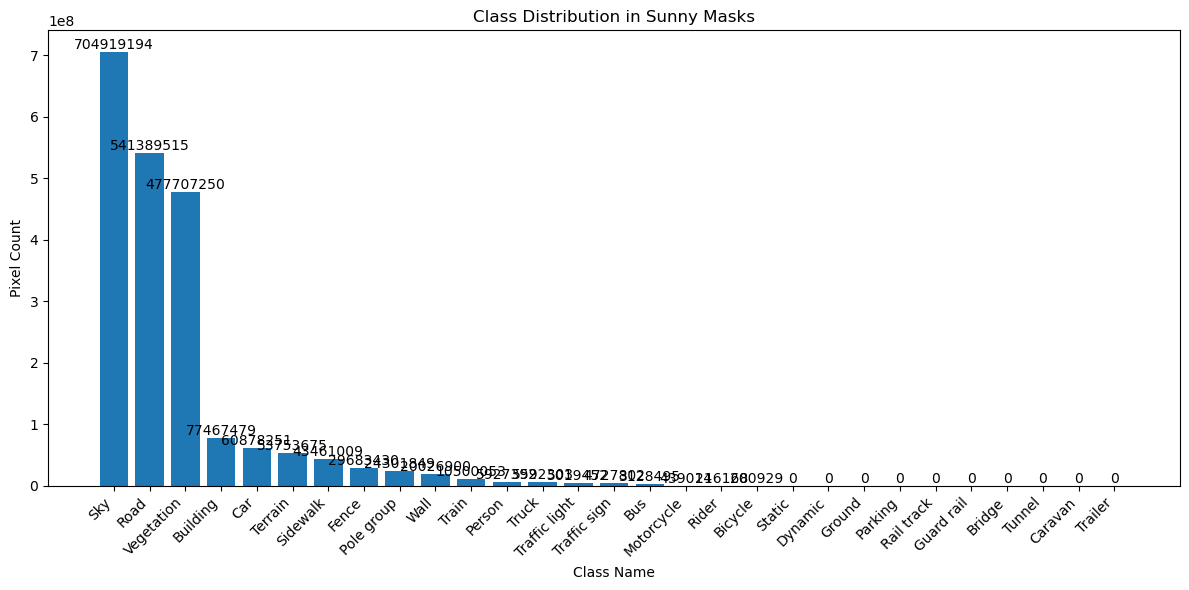

In [9]:
#Randomly select n masks and compute the class distribution (ALL the images would take too long to process).
classDistribution = getClassDistribution(MASK_PATH_LIST, classNames, n=1260)  # 1/3 of the total masks
plotClassDistribution(classDistribution, "Class Distribution in Sunny Masks")

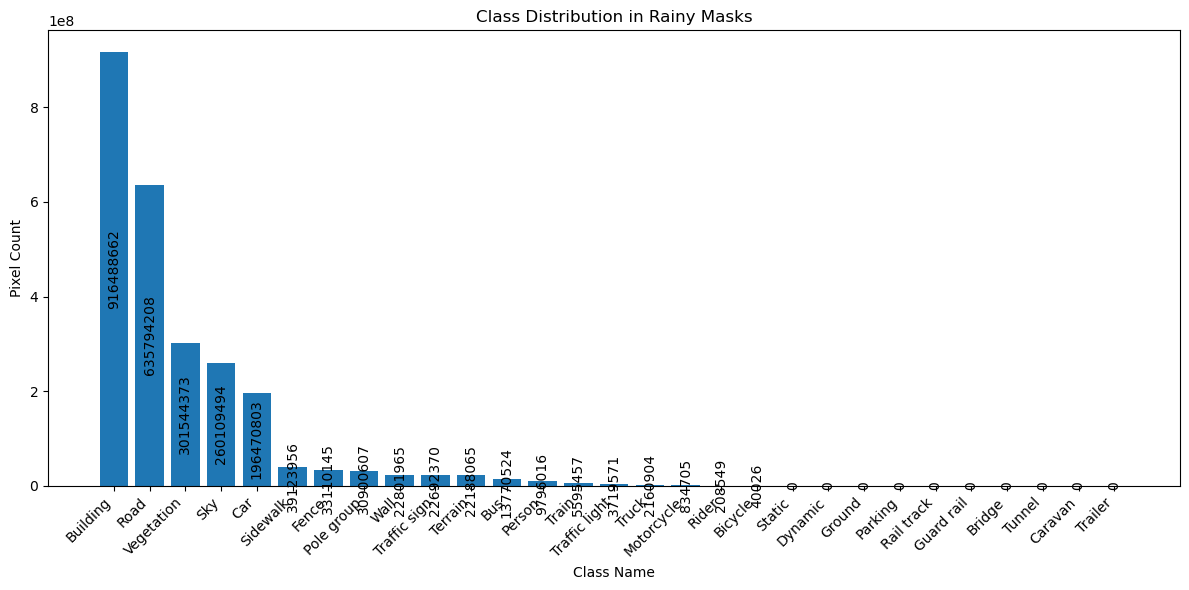

In [20]:
#Randomly select n masks and compute the class distribution (ALL the images would take too long to process).
classDistribution = getClassDistribution(MASK_PATH_LIST, classNames, n=1214)  # 1/3 of the total masks
plotClassDistribution(classDistribution, "Class Distribution in Rainy Masks")

### Check resolution of the images

In [63]:
import os
from PIL import Image
from tqdm import tqdm
from collections import Counter

def logImageResolutions(folderPath):
    if not os.path.exists(folderPath):
        print(f"Error: Folder {folderPath} does not exist.")
        return

    resolutionCounts = Counter()
    for fileName in tqdm(os.listdir(folderPath), desc="Processing files"):
        filePath = os.path.join(folderPath, fileName)
        try:
            with Image.open(filePath) as img:
                resolutionCounts[img.size] += 1  # img.size returns (width, height)
        except Exception as e:
            print(f"Error processing file {fileName}: {e}")

    print(f"Resolution counts in {folderPath}:")
    for resolution, count in resolutionCounts.items():
        print(f"  {resolution}: {count}")

# Example usage
logImageResolutions(rainyImagesPath)
logImageResolutions(rainySsegPath)
logImageResolutions(sunnyImagesPath)
logImageResolutions(sunnySsegPath)


Processing files: 100%|██████████| 3642/3642 [00:01<00:00, 3141.91it/s]


Resolution counts in /net/ens/am4ip/datasets/project-dataset/rainy_images:
  (1920, 1080): 3642


Processing files: 100%|██████████| 3642/3642 [00:01<00:00, 3399.42it/s]


Resolution counts in /net/ens/am4ip/datasets/project-dataset/rainy_sseg:
  (1920, 1080): 3642


Processing files: 100%|██████████| 3779/3779 [03:08<00:00, 20.04it/s]


Resolution counts in /net/ens/am4ip/datasets/project-dataset/sunny_images:
  (1920, 1080): 2729
  (910, 512): 1050


Processing files: 100%|██████████| 3779/3779 [00:01<00:00, 3406.00it/s]

Resolution counts in /net/ens/am4ip/datasets/project-dataset/sunny_sseg:
  (910, 512): 1050
  (1920, 1080): 2729


Same aspect ratio for all the images!

do destructive resizing for sunny? 

### Check for different file extensions

In [3]:
import os
from collections import Counter

def countImageFileExtensions(folderPath):
    # Ensure the folder exists
    if not os.path.isdir(folderPath):
        raise FileNotFoundError(f"The folder {folderPath} does not exist.")

    # Extract file extensions
    fileExtensions = [os.path.splitext(file)[1].lower() for file in os.listdir(folderPath) if os.path.isfile(os.path.join(folderPath, file))]

    # Count occurrences of each extension
    extensionCounts = Counter(fileExtensions)

    return dict(extensionCounts)

# Example usage
print(countImageFileExtensions(sunnyImagesPath))
print(countImageFileExtensions(sunnySsegPath))
print(countImageFileExtensions(rainyImagesPath))
print(countImageFileExtensions(rainySsegPath))


{'.png': 2729, '.jpg': 1050}
{'.png': 3779}
{'.png': 3642}
{'.png': 3642}
